In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/var/folders/1t/26qzvnx504l86jx0wg0z9k900000gn/T/ipykernel_76469/3336373028.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


2.16.1


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)
print("X test shape:", x_test.shape)
print("Y test shape:", y_test.shape)

X train shape: (60000, 28, 28)
Y train shape: (60000,)
X test shape: (10000, 28, 28)
Y test shape: (10000,)


<Axes: ylabel='Count'>

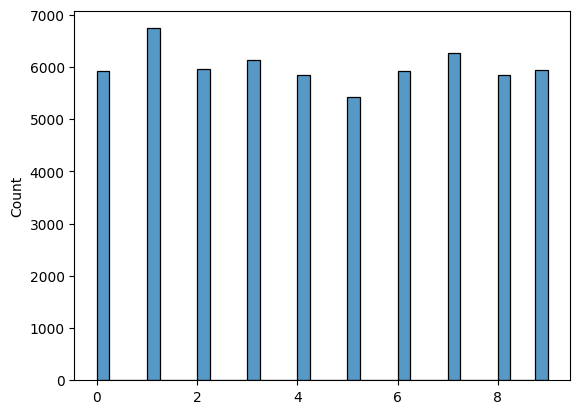

In [4]:
sns.histplot(y_train)

In [5]:
input_shape = (28,28,1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [6]:
print("X train shape:", x_train.shape)
print("X test shape:", x_test.shape)

X train shape: (60000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)


In [7]:
# y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
# y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [8]:
print("Y train shape:", y_train.shape)
print("Y test shape:", y_test.shape)

Y train shape: (60000,)
Y test shape: (10000,)


0


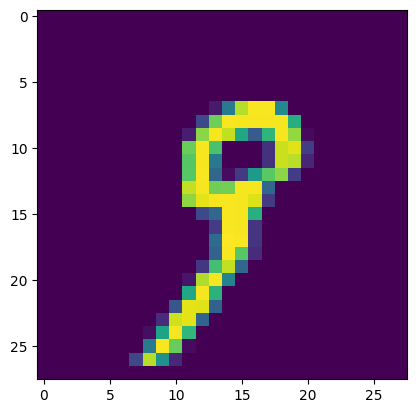

In [9]:
index = 19
print(np.argmax(y_train[index]))
plt.imshow(x_train[index][:,:,:])

In [10]:
batch_size = 10
epochs = 20
classes = 10

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='tanh', input_shape=input_shape),
#     tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size = 2, strides = 2),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (5,5), activation='tanh'),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size = 2, strides = 2),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation='softmax')
])

##Learning: Sparse Categorical Entropy loss is used when the target variable isn't one hot encoded, else use categorical cross entropy loss
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,622 (135.24 KB)

 Trainable params: 34,622 (135.24 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8891 - loss: 0.3673 - val_accuracy: 0.9763 - val_loss: 0.0860
Epoch 2/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9738 - loss: 0.0854 - val_accuracy: 0.9848 - val_loss: 0.0578
Epoch 3/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9823 - loss: 0.0560 - val_accuracy: 0.9833 - val_loss: 0.0546
Epoch 4/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9852 - val_loss: 0.0519
Epoch 5/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9840 - val_loss: 0.0521
Epoch 6/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9860 - val_loss: 0.0497
Epoch 7/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9860 - val_loss: 0.0512
Epoch 8/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9927 - loss: 0

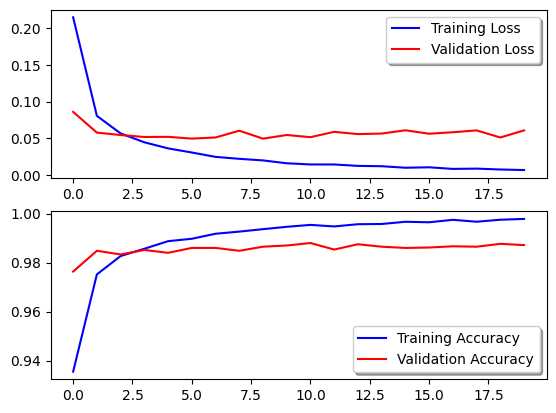

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0599
